In [1]:
import torch
import torchkbnufft as tkbn
import numpy as np
print(torch.cuda.is_available())
if (torch.cuda.is_available()):
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
import mapvbvd
import scipy.io as io
import matplotlib.pyplot as plt

True


In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [69]:
fpath = "/home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/"
fname = "meas_MID00024_FID05676_qijia_CV_VEPCASL_radial_64_36x22_200hz_nosong"
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00017_FID05698_qijia_CV_VEPCASL_radial_64_36x23_100hz_sinv.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00018_FID05699_qijia_CV_VEPCASL_gurney_64_36x23_100hz_sinv.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00019_FID05671_qijia_CV_VEPCASL_gurney_64_36x89_100hz.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00019_FID05700_qijia_CV_VEPCASL_johnson_64_36x23_100hz_sinv.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00020_FID05672_qijia_CV_VEPCASL_johnson_64_36x89_100hz.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00021_FID05673_qijia_CV_VEPCASL_radial_64_36x22_200hz.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00022_FID05674_qijia_CV_VEPCASL_gurney_64_36x22_200hz.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00023_FID05675_qijia_CV_VEPCASL_johnson_64_36x22_200hz.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00024_FID05676_qijia_CV_VEPCASL_radial_64_36x22_200hz_nosong.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00025_FID05677_qijia_CV_VEPCASL_gurney_64_36x22_200hz_nosong.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00026_FID05678_qijia_CV_VEPCASL_johnson_64_36x22_200hz_nosong.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00027_FID05679_qijia_CV_VEPCASL_radial_64_36x22_200hz_sinv.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00028_FID05680_qijia_CV_VEPCASL_gurney_64_36x22_200hz_sinv.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00029_FID05681_qijia_CV_VEPCASL_johnson_64_36x22_200hz_sinv.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00030_FID05682_qijia_CV_VEPCASL_radial_128_36x22_200hz.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00031_FID05683_qijia_CV_VEPCASL_gurney_128_36x22_200hz.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00032_FID05684_qijia_CV_VEPCASL_johnson_128_36x22_200hz.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00033_FID05685_qijia_CV_VEPCASL_radial_128_36x22_200hz_sinv.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00034_FID05686_qijia_CV_VEPCASL_gurney_128_36x22_200hz_sinv.dat
# /home/fs0/qijia/scratch/origin_data/cone_dev/phantom/raw_data_15-3-22/meas_MID00035_FID05687_qijia_CV_VEPCASL_johnson_128_36x22_200hz_sinv.dat
twix_obj = mapvbvd.mapVBVD(fpath+fname+".dat")[1]
twix_obj.image.flagRemoveOS = False
twix_obj.image.flagIgnoreSeg = True
twix_obj.image.squeeze = True
kdata = twix_obj.image[:,:,:,:,:]
print(kdata.shape, kdata.dtype)
Nsegs = twix_obj.hdr.Config.NSeg
NCols, NCoils, NLines, Navgs, NPhases = kdata.shape
Nshots = NLines / Nsegs


pymapVBVD version 0.4.8
Software version: VD


Scan 1/2, read all mdhs:   0%|          | 0.00/33.2M [00:00<?, ?B/s]

Scan 2/2, read all mdhs:   0%|          | 0.00/600M [00:00<?, ?B/s]

read data:   0%|          | 0/4752 [00:00<?, ?it/s]

/home/fs0/qijia/miniconda3/envs/pytorch-1.1-gpu_py39/lib/python3.9/site-packages/mapvbvd/twix_map_obj.py:766: RuntimeWarning: invalid value encountered in add
  raw = (raw[:, 0] + 1j * raw[:, 1]).reshape(readShape, order='F')


(512, 32, 792, 2, 3) complex64


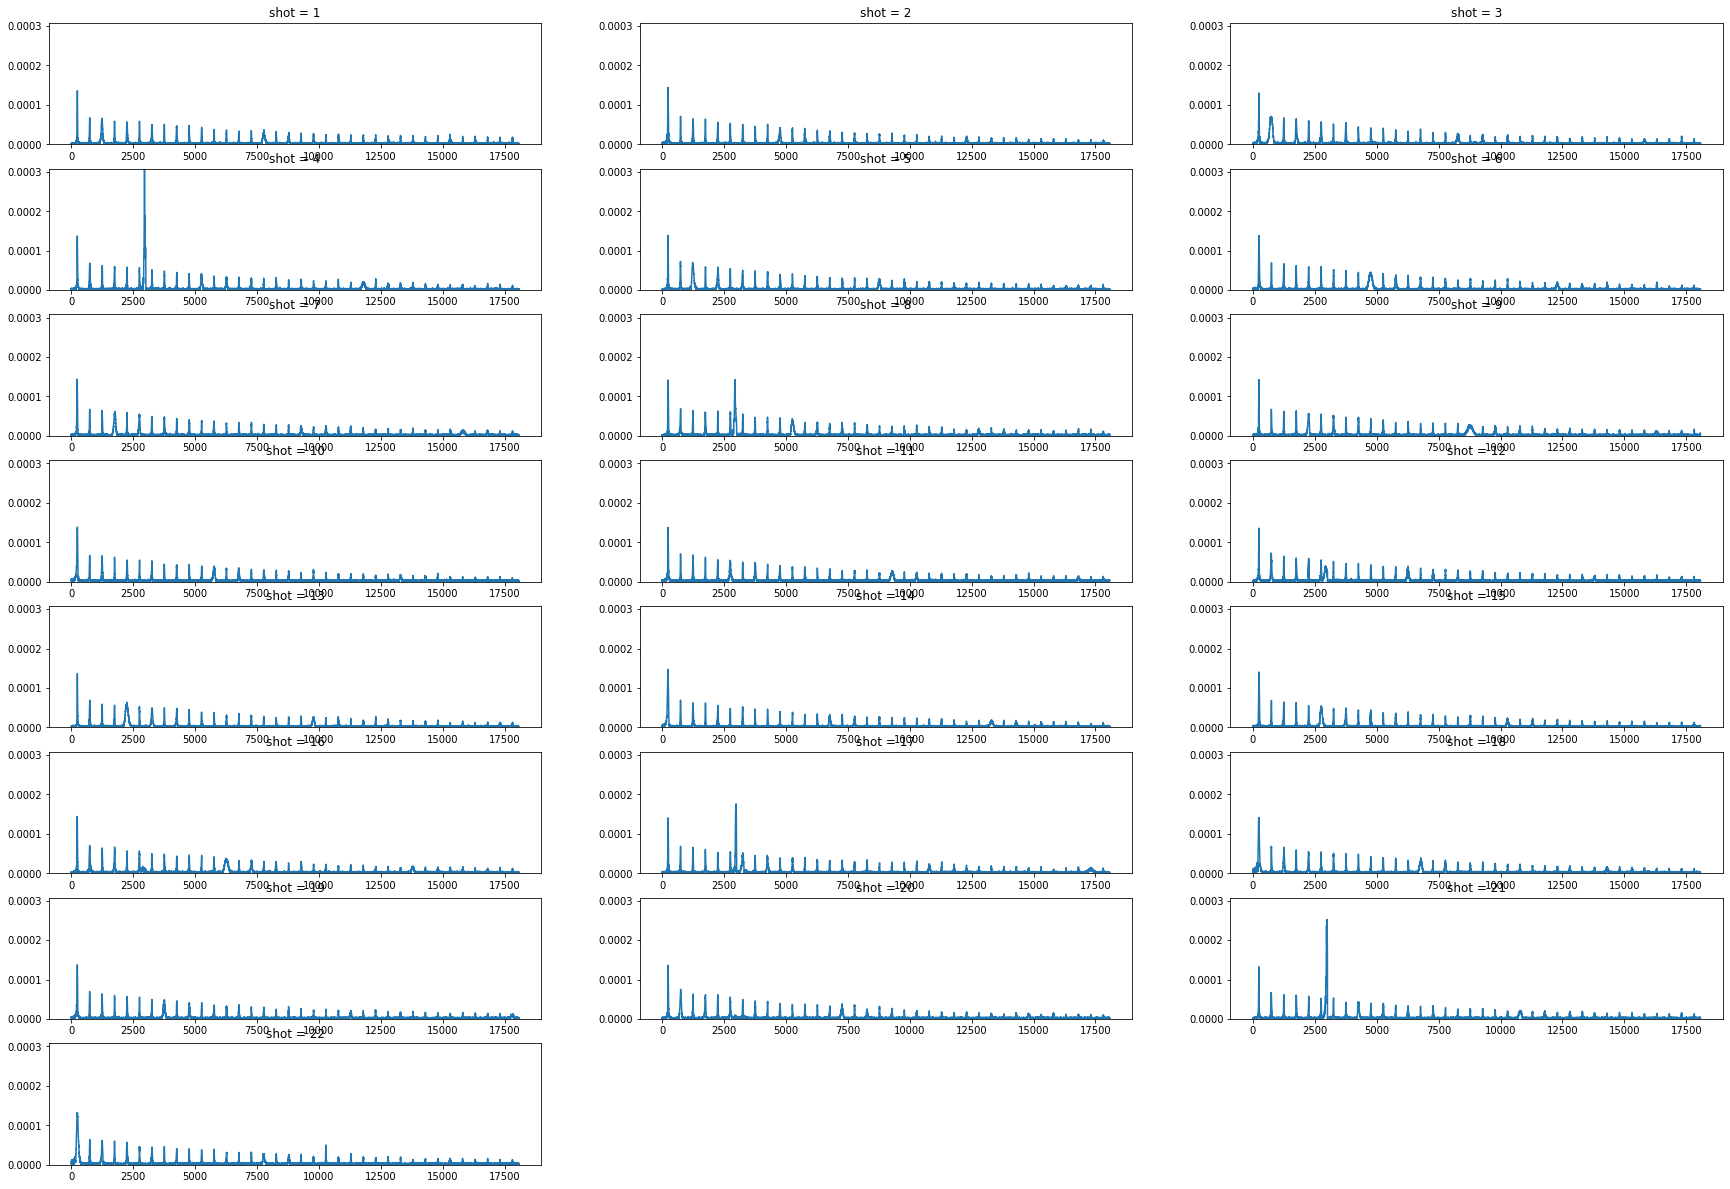

In [70]:
import time
from IPython import display
Nsegs = int(Nsegs)
Nshots = int(Nshots)
image = np.reshape(kdata, (NCols, NCoils, Nsegs, Nshots, Navgs, NPhases), order='F')
NCols2 = NCols - 10
a = np.squeeze(image[10:,0,:,:,1,0] - image[10:,0,:,:,0,0])
a = np.reshape(a, (-1, Nshots), order='F')
plt.figure(figsize=(30,20*4))
for i in range(Nshots):
    # plt.figure(figsize=(30,10))
    plt.subplot(30,3,i+1)
    # plt.clf()
    plt.plot(np.arange(int(Nsegs*NCols2)), np.abs(a[np.arange(Nsegs*NCols2, step=1),i]))
    plt.ylim(0,np.max(np.abs(a)))
    plt.title("shot = "+str(i+1))
    # fig.canvas.draw()
plt.show()
    # time.sleep(0.3)
    # display.clear_output(wait=True)
    # display.display(plt.gcf())



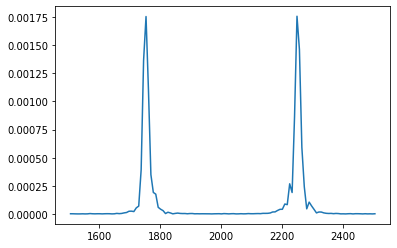

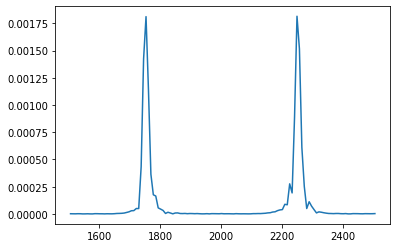

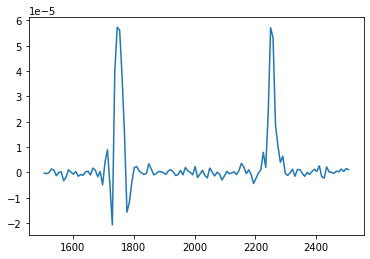

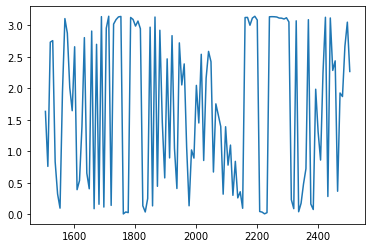

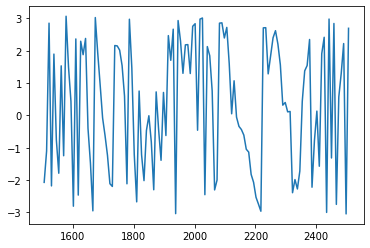

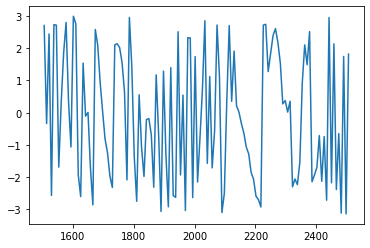

In [75]:
a1 = np.squeeze(image[10:,0,:,:,0,0])
a1 = np.reshape(a1, (-1, Nshots), order='F')
ind = np.arange(start=3*NCols2, stop=5*NCols2, step=8)
shot = 7
plt.plot(ind, np.abs(a1[ind,shot]))
plt.show()
a2 = np.squeeze(image[10:,0,:,:,1,0])
a2 = np.reshape(a2, (-1, Nshots), order='F')
plt.plot(ind, np.abs(a2[ind,shot]))
plt.show()

plt.plot(ind, np.abs(a2[ind,shot]) - np.abs(a1[ind,shot]))
plt.show()

# plt.plot(ind, np.abs(a2[ind,shot] - a1[ind,shot]))
plt.show()

plt.plot(ind, np.mod(np.angle(a2[ind,shot]) - np.angle(a1[ind,shot]) + 2*np.pi, np.pi))
plt.show()

plt.plot(ind, np.angle(a1[ind,shot]))
plt.show()

plt.plot(ind, np.angle(a2[ind,shot]))
plt.show()

### Load phantom image

dict_keys(['__header__', '__version__', '__globals__', 'img', 'scales'])
(64, 64, 64)


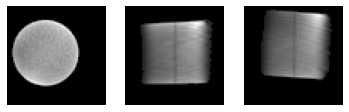

torch.complex64


In [14]:
image = io.loadmat("/home/fs0/qijia/scratch/origin_data/cone_dev/phantom/sim_phantom_img/radial_dn.mat")
print(image.keys())
image = image['img']
print(image.shape)

plt.figure()
plt.gray()
plt.subplot(1,3,1)
plt.imshow(np.squeeze(image[:,:,32]))
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(np.squeeze(image[:,32,:]))
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(np.squeeze(image[32,:,:]))
plt.axis('off')
plt.show()


image = torch.tensor(image, dtype = torch.complex64, device=device).unsqueeze(0).unsqueeze(0)
print(image.dtype)

### create trajectory `[Ndims, NColsxNLines]`

In [7]:
NCols=128
NLines = 3204
base_k = np.linspace(-np.pi, np.pi, NCols)
Phis = [0.465571231876768, 0.682327803828019]
GRCounter = np.arange(3204)
kz = np.mod(GRCounter * Phis[0], 1)*2 - 1
Polar = np.arccos(kz)
Azi = np.mod(GRCounter*Phis[1], 1)*2*np.pi

In [8]:
Gp = np.sin(Azi)*np.sin(Polar)
Gr = np.cos(Azi)*np.sin(Polar)
Gs = np.cos(Polar)
print(Gp.shape)
print(base_k.shape)

(3204,)
(128,)


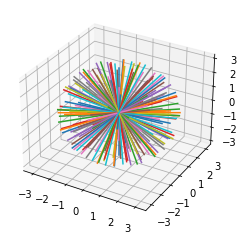

RuntimeError: CUDA error: all CUDA-capable devices are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [9]:
ktraj = np.zeros((3,3204*NCols))
for i in range(3204):
    ktraj[0,i*NCols:((i+1)*NCols)] = Gp[i]*base_k
    ktraj[1,i*NCols:((i+1)*NCols)] = Gr[i]*base_k
    ktraj[2,i*NCols:((i+1)*NCols)] = Gs[i]*base_k

kspace = np.reshape(ktraj,(3,3204,NCols))
ax = plt.axes(projection='3d')
for i in range(100):
# i=3
    ax.plot3D(np.squeeze(kspace[0,i,:]), np.squeeze(kspace[1,i,:]), np.squeeze(kspace[2,i,:]))
plt.show()

# ktraj = torch.tensor(ktraj, device=device)
print(ktraj.dtype)

### create NUFFT operator

In [58]:
nufft_ob = tkbn.KbNufft(im_size=(64,64,64),grid_size=(128,128,128)).to(device)
adjnufft_ob = tkbn.KbNufftAdjoint(im_size=(64,64,64),grid_size=(128,128,128)).to(device)

In [59]:
print(nufft_ob)
print(adjnufft_ob)


KbNufft
----------------------------------------
buffers
	tensor: table_0, shape: (6145,)
	tensor: table_1, shape: (6145,)
	tensor: table_2, shape: (6145,)
	tensor: im_size, shape: (3,)
	tensor: grid_size, shape: (3,)
	tensor: n_shift, shape: (3,)
	tensor: numpoints, shape: (3,)
	tensor: offsets, shape: (216, 3)
	tensor: table_oversamp, shape: (3,)
	tensor: order, shape: (3,)
	tensor: alpha, shape: (3,)
	tensor: scaling_coef, shape: (64, 64, 64)


KbNufftAdjoint
----------------------------------------
buffers
	tensor: table_0, shape: (6145,)
	tensor: table_1, shape: (6145,)
	tensor: table_2, shape: (6145,)
	tensor: im_size, shape: (3,)
	tensor: grid_size, shape: (3,)
	tensor: n_shift, shape: (3,)
	tensor: numpoints, shape: (3,)
	tensor: offsets, shape: (216, 3)
	tensor: table_oversamp, shape: (3,)
	tensor: order, shape: (3,)
	tensor: alpha, shape: (3,)
	tensor: scaling_coef, shape: (64, 64, 64)



### Generate PSF

In [22]:
kpsf = torch.ones(1,1,NCols*NLines, dtype=torch.complex64, device=device)
dcomp = tkbn.calc_density_compensation_function(ktraj=ktraj, im_size=(64,64,64))
PSF = adjnufft_ob(kpsf*dcomp, ktraj)

(410112,)
(3, 410112)
(410112,)


/tmp/ipykernel_108531/736824922.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  sd[i] = np.mean(dcomp_np[ind])


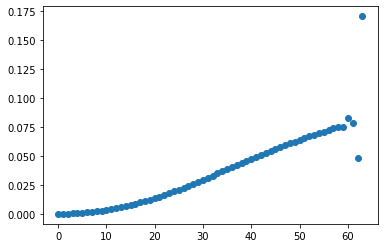

In [49]:
# Calculate density compensation vs radius
ktraj_np = ktraj.squeeze().cpu().numpy()
dcomp_np = dcomp.squeeze().cpu().numpy()
print(dcomp_np.shape)
print(ktraj_np.shape)
k_r = np.squeeze(np.sqrt(np.sum(ktraj_np*ktraj_np, 0)))
print(k_r.shape)
sd = np.zeros(64)
kr_bins = np.linspace(np.min(k_r), np.max(k_r), 65)
for i in range(64):
    ind = np.bitwise_and( k_r>kr_bins[i], k_r<kr_bins[i+1])
    sd[i] = np.mean(dcomp_np[ind])
plt.figure()
plt.scatter(range(64), sd)
plt.show()

(64, 64, 64)


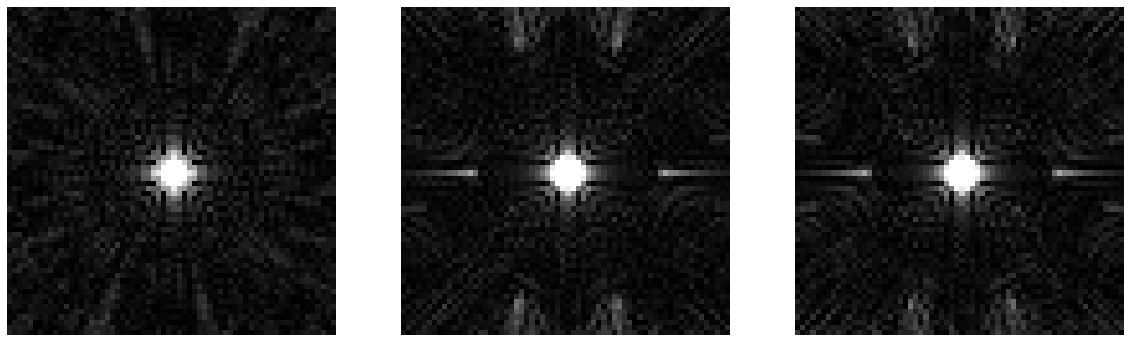

In [46]:
# PSF = PSF.cpu().numpy()
PSF = np.squeeze(np.abs(PSF))
print(PSF.shape)
PSF = PSF / np.max(PSF)
plt.figure(figsize=(20,20))
plt.gray()
plt.subplot(1,3,1)
plt.imshow(np.squeeze(PSF[:,:,32]), vmin=0, vmax=0.02)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(np.squeeze(PSF[:,32,:]), vmin=0, vmax=0.02)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(np.squeeze(PSF[32,:,:]), vmin=0, vmax=0.02)
plt.axis('off')
plt.show()

In [30]:
print(image.shape)
print(ktraj.shape)

torch.Size([1, 1, 64, 64, 64])
torch.Size([3, 410112])


In [52]:
kdata = nufft_ob(image, ktraj)
print(kdata.shape)

torch.Size([1, 1, 410112])


In [60]:
dcomp = tkbn.calc_density_compensation_function(ktraj=ktraj, im_size=(64,64,64))
print(dcomp.shape)
print(kdata.shape)
recon_img = adjnufft_ob(kdata*dcomp, ktraj)

torch.Size([1, 1, 410112])
torch.Size([1, 1, 410112])


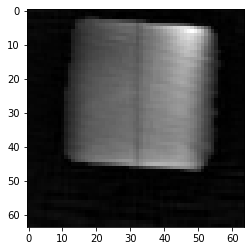

In [63]:
recon_img = np.squeeze(recon_img.cpu().numpy())
print(recon_img.shape)
print(recon_img.dtype)
plt.figure()
plt.imshow(np.squeeze(np.absolute(recon_img[32,:,:])))
plt.show()

torch.complex128


IndexError: index 32 is out of bounds for dimension 0 with size 1

<Figure size 432x288 with 0 Axes>

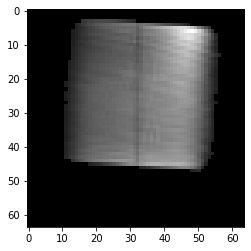

In [35]:
plt.figure()
plt.gray()
plt.imshow(np.squeeze(np.absolute(image[:,:,33].cpu().numpy())))
plt.show()